## Data Collection

In [1]:
## Data has been collected, i.e, My teammate has scrapped the web and collected the necessary images for each specific image damage subtype.
## This Data contains plain and proper images, they need to be prepared to be useful for the creation of CNN's for the purpose of Image Restoration, i.e, Blurring,Noise,Scratched and Water-Spilled effects must be applied to these collected datsets to actually create useful data folders.
# Essentally this Data Preparation step is to create datasets to feed to CNN, to train it in the field of Image Restoration.

## Importing Required Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from PIL import Image

## Data Preparation

In [3]:
## The proper photos are stored in folders in their respective folders, so first we will begin by providing the paths for each pf the folders.

In [4]:
path_to_convert_to_blurry = './data/proper_to_be_blurred'

In [5]:
path_to_convert_to_noisy = './data_noise/plain_to_turn_noisy'

In [6]:
path_to_convert_to_scratched = './data_scratch/proper_to_be_scratched'

In [7]:
path_to_convert_to_water_spilled='./data_water_spilled/proper_to_be_spilled'

### Folder Creation

In [8]:
## Creating the folder where we will save the prepared images that will be fed to the CNN
# writig a function for folder creation
def folder_creation(folder_path):
    if os.path.exists(folder_path): #to check if path already exists
        shutil.rmtree(folder_path) #to remove any prior folder in the name of our file, to avoid conclusion
    os.mkdir(folder_path)
    print('File has been sucessfully created.') #to ensure complete running of the code

In [9]:
#creating folders for blur and sharp data for model_unblur CNN
path_to_blur = './data/blur'
path_to_sharp = './data/sharp'
folder_creation(path_to_blur)
folder_creation(path_to_sharp)

File has been sucessfully created.
File has been sucessfully created.


In [10]:
#creating folders for noisy and clear data for model_denoise CNN
path_to_noise = './data_noise/noise'
path_to_clear = './data_noise/clear'
folder_creation(path_to_noise)
folder_creation(path_to_clear)

File has been sucessfully created.
File has been sucessfully created.


In [11]:
#creating folders for scratched and original data for model_unscratch CNN
path_to_scratch = './data_scratch/scratched'
path_to_original = './data_scratch/original'
folder_creation(path_to_scratch)
folder_creation(path_to_original)

File has been sucessfully created.
File has been sucessfully created.


In [12]:
#creating folders for water_spilled and normal data for model_despill CNN
path_to_water_spilled = './data_water_spilled/water_spilled'
path_to_normal = './data_water_spilled/normal'
folder_creation(path_to_water_spilled)
folder_creation(path_to_normal)

File has been sucessfully created.
File has been sucessfully created.


### Data Cross-Checking

In [13]:
#I have written a function to cross-check all of the data in our source folders, to make sure all the images can be read.
#This function also removes unreadable files, i.e, files that are not in the format of '.jpg','.png','.jpeg' etc.
def cross_checker(checking_path,to_remove):
    for image in os.scandir(checking_path):
        try:
            img = cv2.imread(image.path)
            img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        except Exception as e:
            to_remove.append(image.path)
            continue

In [14]:
# As the cross_checker function collects all the un-readable files, this remover function will remove them from the source dataset, so they don't cause problems in fucrther processing of data.
def remover(path,to_remove):
    for image in os.scandir(path):
        for error in to_remove:
            if image.path==error:
                os.remove(image.path)
    #now as we have deleted every single error causing data point, we will clear the to_remove list.
    to_remove.clear()

In [15]:
#Passing the to_blur source folders through the cross_cheker and remover functions
fail = [] #to store the removing elements
cross_checker(path_to_convert_to_blurry,fail)
remover(path_to_convert_to_blurry,fail)

In [16]:
#Passing the to_noise source folders through the cross_cheker and remover functions
fail=[]
cross_checker(path_to_convert_to_noisy,fail)
remover(path_to_convert_to_noisy,fail)

In [17]:
#Passing the to_scratch source folders through the cross_cheker and remover functions
fail = []
cross_checker(path_to_convert_to_scratched,fail)
remover(path_to_convert_to_scratched,fail)

In [18]:
#Passing the to_water_spill source folders through the cross_cheker and remover functions
fail = []
cross_checker(path_to_convert_to_water_spilled,fail)
remover(path_to_convert_to_water_spilled,fail)

## Visualizing data as a Sample before processing the data

In [19]:
# Creating a function that will view sample images and make the process of visualization easier
def sample_viewer(image_path):
    for image in os.scandir(image_path):
        img = cv2.imread(image.path)
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        break

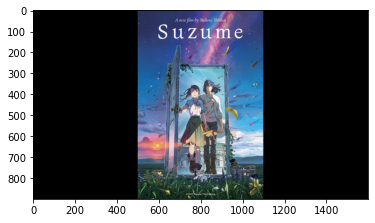

In [20]:
## visualizing a sample image from the dataset to which the Blurring efect will be added
sample_viewer(path_to_convert_to_blurry)

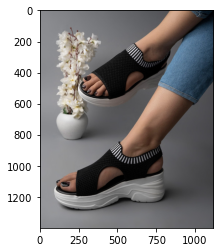

In [21]:
## visualizing a sample image from the dataset to which the Noise efect will be added
sample_viewer(path_to_convert_to_noisy)

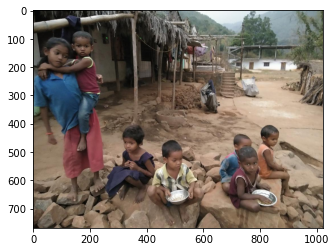

In [22]:
## visualizing a sample image from the dataset to which the Scratched efect will be added
sample_viewer(path_to_convert_to_scratched)

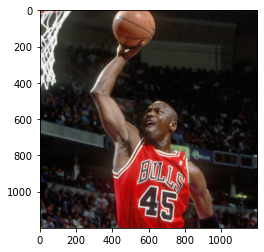

In [23]:
## visualizing a sample image from the dataset to which the Water_spilled efect will be added
sample_viewer(path_to_convert_to_water_spilled)

## Adding the Required Damage effects onto the Datasets

In [24]:
# As every dataset deals with a particular Image Related Damage, I will need to write seperate functions for each and every defect image will have to restore

#### 1st Case of Image Damage - Blur Images

In [25]:
#Writing a function to add the blurring effect to all the images in the path_to_convert_to_blurry folder.
def blurring(image_path):
    count=0 #To help in name_creation.
    for image in os.scandir(image_path):
        img = cv2.imread(image.path)
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #the sharp image in original form(RGB)
        
        #Adding the Gausian Blur for the Blurring effect
        imgBlur = cv2.GaussianBlur(img_rgb,(31,31),0)
        #saving the file in a new folder that will be used as X for training the CNN.
        blur_saving = 'imgblur' + str(count) + '.jpg'
        blur_path = path_to_blur + '\\' + blur_saving
        cv2.imwrite(blur_path,imgBlur)
        
        #saving the sharp counter parts with similar naming conventions to be used as Y for training the CNN.
        sharp_saving = 'imgsharp'+str(count)+'.jpg'
        sharp_path = path_to_sharp+'\\'+ sharp_saving
        cv2.imwrite(sharp_path,img_rgb)
        
        count+=1 #Incrementing
    print('Blur Effect has been added Successfully')

In [26]:
#passing the to_be_blurred folder through the blurring function
blurring(path_to_convert_to_blurry)

Blur Effect has been added Successfully


#### 2nd Case of Image Damage - Noisy/Grainy Images

In [27]:
#Writing a function that will apply the noise effect to all the images in the path_to_convert_to_noisy folder.
def noise(image_path, grain_amount=0.1):
    count=0 #To help in naming_convention
    for image in os.scandir(image_path):
        img = cv2.imread(image.path)
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img_np = np.array(img) #converting the image into an np.array that will help us in generating the Gaussian Blur
    
        # First, we will generate Gaussian noise
        row, col, ch = img_np.shape
        mean = 0
        sigma = grain_amount * 255
        gauss = np.random.normal(mean, sigma, (row, col, ch))
        gauss = gauss.reshape(row, col, ch)
    
        # Now, we add the Gaussian noise to the image
        noisy = img_np + gauss
        #Converting the np.array back into the Image form
        try:
            noisy = Image.fromarray(noisy)
        except:
            pass
        #As the noisy effect has been added now its time to save the image.
        noise_name = 'imgnoisy' + str(count) + '.jpg'
        noise_path = path_to_noise + '\\' + noise_name
        cv2.imwrite(noise_path,noisy)
        
        #Saving the clear counterparts of the images
        clear_name = 'imgclear' + str(count) + '.jpg'
        clear_path = path_to_clear + '\\' + clear_name
        cv2.imwrite(clear_path,img_rgb)
        
        count+=1 #Incrementing
    print('Noise Effect has been added Successfully!')

In [28]:
#passing the to_be_noisy folder through the add_noise function
noise(path_to_convert_to_noisy)

Noise Effect has been added Successfully!


#### 3rd Case of Image Damage - Scratched Images

In [29]:
#Writing a function that will add the scratched effect to all the images in the path_to_convert_to_scratched folder.
def scratch(image_path, num_scratches=20, max_length=100):
    count=0 #To help in naming the files while saving them
    for image in os.scandir(image_path):
        img = cv2.imread(image.path)
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        height, width, channels = img.shape

        for _ in range(num_scratches):
            # Random starting point and direction for the scratch
            start_x = np.random.randint(0, width)
            start_y = np.random.randint(0, height)
            theta = np.random.uniform(0, 2 * np.pi)  # Random angle

            # Calculate scratch end point
            end_x = int(start_x + max_length * np.cos(theta))
            end_y = int(start_y + max_length * np.sin(theta))

            # Ensure the line stays within the image bounds
            end_x = np.clip(end_x, 0, width-1)
            end_y = np.clip(end_y, 0, height-1)

            # Draw the scratch as a white line on the image
            cv2.line(img, (start_x, start_y), (end_x, end_y), (255, 255, 255), 1)
            
        #After scratches have been added, its time to save the scratched images
        scratch_name = 'imgscratched' + str(count) + '.jpg'
        scratch_file = path_to_scratch + '\\' + scratch_name
        cv2.imwrite(scratch_file,img)
        
        #Saving the original counterparts
        original_name = 'imgorg' + str(count) + '.jpg'
        original_path = path_to_original + '\\' + original_name
        cv2.imwrite(original_path,img_rgb)
        
        count+=1 #Incrementing
    print('Scratches have been added Successfully!')

In [30]:
#passing the to_be_scratched folder through the scratch function
scratch(path_to_convert_to_scratched)

Scratches have been added Successfully!


#### 4th Case of Image Damage - Water Spill

In [38]:
#Writing a function that will add the water spill effect to all the images in the path_to_convert_to_water_spilled folder.
def water_spill(image_path, alpha=0.5):
    count = 0 #This will help us while namin our efect added images
    for image in os.scandir(image_path):
        img = cv2.imread(image.path)
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        # Step 1. A semi-transparent overlay has to be created, i.e, water spill.
        height, width, channels = img.shape
        spill = np.random.uniform(0.9, 1.0, (height, width, channels)).astype(np.float32) # Vary between 0.9 and 1.0 for some texture.
        spill_overlay = spill
        
        # We will be using a circular region for the water spill
        center = (img.shape[1] // 2, img.shape[0] // 2)
        radius = min(center) // 2
        mask = np.zeros(img.shape[:2], dtype=np.uint8)
        cv2.circle(mask, center, radius, (255, 255, 255), -1)

        # Step 2. Consists of Warpping/distorting the image underneath the overlay
        d = 5  # d represents the amount of distortion
        for i in range(mask.shape[0]):
            for j in range(mask.shape[1]):
                if mask[i, j]:
                    if np.random.rand() > 0.5:
                        if i < mask.shape[0] - d:
                            img[i, j] = img[i + d, j]
                    else:
                        if j < mask.shape[1] - d:
                            img[i, j] = img[i, j + d]

        # Step 3. We have to combine the original image and the overlay using the mask
        water_spill_img = cv2.addWeighted(img, 1 - alpha, (spill_overlay * 255).astype(np.uint8), alpha, 0)
        water_spill_img = cv2.bitwise_and(water_spill_img, water_spill_img, mask=mask)
        background = cv2.bitwise_and(img, img, mask=~mask)
        water_spilled = cv2.add(water_spill_img, background)

        #Saving the water_spill effect added image
        water_name = 'waterspilled' + str(count) + '.jpg'
        water_file = path_to_water_spilled + '\\' + water_name
        cv2.imwrite(water_file,water_spilled)

        #Saving the normal counter parts
        normal_name = 'imgnormal' + str(count) + '.jpg'
        normal_file = path_to_normal + '\\' + normal_name
        cv2.imwrite(normal_file,img_rgb)

        count+=1 #Incrementing
    
    print('Water Spilled effect has been added Successfully!')

In [40]:
#passing the to_be_scratched folder through the water_spill function
water_spill(path_to_convert_to_water_spilled)

Water Spilled effect has been added Successfully!


## Visualization post Preparation of Images, i.e addition of the damage effects and creation of training data for the CNN.

In [41]:
#To visualize the images after addition of effects have been done, lets use the sample_viewer function I have already written.

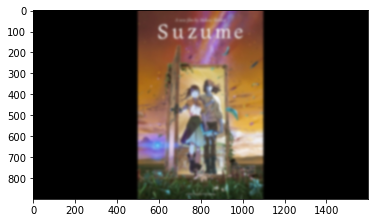

In [42]:
#visualizing the blur effect added image
sample_viewer(path_to_blur)

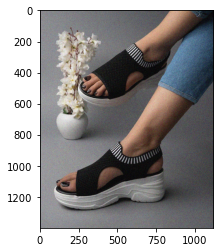

In [43]:
#viusalizing the noise effect added image
sample_viewer(path_to_noise)

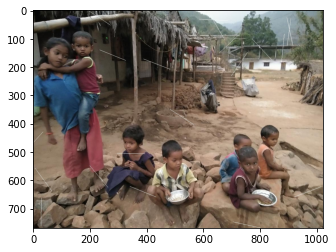

In [44]:
#visualizing the scratch effect added image
sample_viewer(path_to_scratch)

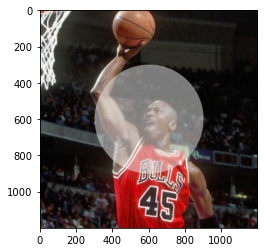

In [45]:
#visualizing the water_spill effect added image
sample_viewer(path_to_water_spilled)

## Milestone 1 - Data Collection and Data Preparation - Completed